In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('final_data_used_cars.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       559 non-null    int64  
 1   ID               559 non-null    int64  
 2   Link             559 non-null    object 
 3   Title            559 non-null    object 
 4   Price            559 non-null    int64  
 5   Miles            559 non-null    float64
 6   Score            348 non-null    float64
 7   Motor            559 non-null    object 
 8   Drive_Type       559 non-null    object 
 9   Transmission     559 non-null    object 
 10  Color            559 non-null    object 
 11  Prior_Use        559 non-null    object 
 12  PreOwner_Amount  559 non-null    int64  
 13  Features         559 non-null    object 
 14  Year             559 non-null    int64  
 15  Brand            559 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 70.0+ KB


In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df = data.drop('ID', axis = 1)
df = df.drop ('Link', axis = 1)
df = df.drop('Motor', axis = 1)
df.head()

,Title,Price,Miles,Score,Drive_Type,Transmission,Color,Prior_Use,PreOwner_Amount,Features,Year,Brand
0,2023 Tesla Model 3,44998,4000.0,7.0,Rear Wheel Drive,Automatic,White,None Prior Use,1,"[""['Air Conditioning'"", "" 'Driver Adjustable L...",2023,Tesla
1,2019 Chevrolet Bolt EV Premier,25998,31000.0,1.0,Front Wheel Drive,Automatic,Silver,Leased vehicle,1,"[""['Bose Sound System'"", "" 'Satellite Radio Re...",2019,Chevrolet
2,2020 Tesla Model Y Long Range,47998,34000.0,8.0,All Wheel Drive,Automatic,White,None Prior Use,2,"[""['Satellite Radio Ready'"", "" 'Skylight(s)'"",...",2020,Tesla
3,2022 Hyundai Ioniq 5 SE,47998,7000.0,6.0,All Wheel Drive,Automatic,Gray,None Prior Use,1,"[""['Air Conditioning'"", "" 'Cloth Seats'"", "" 'D...",2022,Hyundai
4,2019 Volkswagen Golf Electric SE,21998,24000.0,5.0,Front Wheel Drive,Automatic,Gray,Leased vehicle,1,"[""['Air Conditioning'"", "" 'Cloth Seats'"", "" 'C...",2019,Volkswagen


In [7]:
df.Transmission.unique()

array(['Automatic'], dtype=object)

In [8]:
df = df.drop('Transmission', axis = 1)

In [9]:
df.Color.unique()

array(['White', 'Silver', 'Gray', 'Black', 'Blue', 'Pearl', 'Red',
       'Green', 'Tan', 'Orange', 'Yellow'], dtype=object)

In [10]:
list(re.sub(r'[^A-Za-z0-9 ,]+', '', data.Features.loc[0]).split(","))[0]

'Air Conditioning'

In [11]:
features_list = []
for i in range (559):
    list_length = len(list(re.sub(r'[^A-Za-z0-9 ,]+', '', data.Features.loc[i]).split(",")))
    for x in range(list_length):
        item = list(re.sub(r'[^A-Za-z0-9 ,]+', '', data.Features.loc[i]).split(","))[x]
        if item in features_list:
            continue
        else:
            features_list.append(item)

In [12]:
stripped_list = [item.strip() for item in features_list]

In [13]:
del stripped_list[-7]

In [14]:
stripped_list

['Air Conditioning',
 'Driver Adjustable Lumbar',
 'Front Seat Heaters',
 'Heated Steering Wheel',
 'Leatherette Seats',
 'Memory Seats',
 'Rear Seat Heaters',
 'Automatic Highbeams',
 'Bluetooth Technology',
 'Rain Sensing Wipers',
 'Rear View Camera',
 'Smart Key',
 'WiFi Hotspot',
 'Overhead Airbags',
 'Power Locks',
 'Power Mirrors',
 'Power Seats',
 'Power Windows',
 'Side Airbags',
 'ABS Brakes',
 'Alloy Wheels',
 'Daytime Running Lights',
 'Power HatchDeck Lid',
 'Rear Defroster',
 'Automatic Transmission',
 'Automated Cruise Control',
 'Lane Departure Warning',
 'Parking Sensors',
 'Blind Spot Monitor',
 'CrossTraffic Alert',
 'Bose Sound System',
 'Satellite Radio Ready',
 'Air Conditioning',
 'Leather Seats',
 'AMFM Stereo',
 'Auxiliary Audio Input',
 'SiriusXM Trial Available',
 'Cruise Control',
 'Remote Start',
 'Traction Control',
 'Apple CarPlay',
 'Android Auto',
 'Satellite Radio Ready',
 'Skylights',
 'Fog Lamps',
 '4WDAWD',
 'Cloth Seats',
 'Navigation System',
 'CD 

In [15]:
df.isnull().sum()

Title                0
Price                0
Miles                0
Score              211
Drive_Type           0
Color                0
Prior_Use            0
PreOwner_Amount      0
Features             0
Year                 0
Brand                0
dtype: int64

In [16]:
# Ignore scores since its a CarMax specific value

In [17]:
num_col=['Price','Miles','PreOwner_Amount','Year']
cat_cols=['Drive_Type','Color','Prior_Use','Brand']

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
le = preprocessing.LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [20]:
df

,Title,Price,Miles,Score,Drive_Type,Color,Prior_Use,PreOwner_Amount,Features,Year,Brand
0,2023 Tesla Model 3,44998,4000.0,7.0,2,9,7,1,"[""['Air Conditioning'"", "" 'Driver Adjustable L...",2023,14
1,2019 Chevrolet Bolt EV Premier,25998,31000.0,1.0,1,7,3,1,"[""['Bose Sound System'"", "" 'Satellite Radio Re...",2019,2
2,2020 Tesla Model Y Long Range,47998,34000.0,8.0,0,9,7,2,"[""['Satellite Radio Ready'"", "" 'Skylight(s)'"",...",2020,14
3,2022 Hyundai Ioniq 5 SE,47998,7000.0,6.0,0,2,7,1,"[""['Air Conditioning'"", "" 'Cloth Seats'"", "" 'D...",2022,5
4,2019 Volkswagen Golf Electric SE,21998,24000.0,5.0,1,2,3,1,"[""['Air Conditioning'"", "" 'Cloth Seats'"", "" 'C...",2019,15
...,...,...,...,...,...,...,...,...,...,...,...
554,2023 Tesla Model 3,44998,2000.0,NaN,2,9,7,1,"[""['Air Conditioning'"", "" 'Driver Adjustable L...",2023,14
555,2022 Tesla Model Y Long Range,50998,28000.0,NaN,0,2,7,1,"[""['Air Conditioning'"", "" 'Driver Adjustable L...",2022,14
556,2022 Tesla Model 3 Long Range,42998,33000.0,NaN,0,9,7,1,"[""['Air Conditioning'"", "" 'Driver Adjustable L...",2022,14
557,2021 Volkswagen ID.4 EV 1st Edition,34998,32000.0,NaN,2,1,3,1,"[""['Leatherette Seats'"", "" 'Power Seat(s)'"", ""...",2021,15


In [21]:
df_1 = df

In [22]:
df_1.drop('Score', axis = 1, inplace = True)
df_1.drop('Features', axis = 1, inplace = True)

In [23]:
# Normalized Numerical Attributes
norm = StandardScaler()
df_1['Log_Price'] = np.log(df_1['Price'])
df_1['Miles'] = norm.fit_transform(np.array(df_1['Miles']).reshape(-1,1))
df_1['PreOwner_Amount'] = norm.fit_transform(np.array(df_1['PreOwner_Amount']).reshape(-1,1))
df_1['Year'] = norm.fit_transform(np.array(df_1['Year']).reshape(-1,1))

In [24]:
df_1

,Title,Price,Miles,Drive_Type,Color,Prior_Use,PreOwner_Amount,Year,Brand,Log_Price
0,2023 Tesla Model 3,44998,-1.318049,2,9,7,-0.493399,1.531744,14,10.714373
1,2019 Chevrolet Bolt EV Premier,25998,0.643430,1,7,3,-0.493399,-0.757681,2,10.165775
2,2020 Tesla Model Y Long Range,47998,0.861372,0,9,7,1.241255,-0.185325,14,10.778915
3,2022 Hyundai Ioniq 5 SE,47998,-1.100107,0,2,7,-0.493399,0.959388,5,10.778915
4,2019 Volkswagen Golf Electric SE,21998,0.134898,1,2,3,-0.493399,-0.757681,15,9.998707
...,...,...,...,...,...,...,...,...,...,...
554,2023 Tesla Model 3,44998,-1.463344,2,9,7,-0.493399,1.531744,14,10.714373
555,2022 Tesla Model Y Long Range,50998,0.425487,0,2,7,-0.493399,0.959388,14,10.839542
556,2022 Tesla Model 3 Long Range,42998,0.788724,0,9,7,-0.493399,0.959388,14,10.668909
557,2021 Volkswagen ID.4 EV 1st Edition,34998,0.716077,2,1,3,-0.493399,0.387031,15,10.463046


In [25]:
# Train test split
X_columns = ['Miles', 'Drive_Type', 'Color', "Prior_Use", 'PreOwner_Amount', 'Year']

X = df_1[X_columns]
y = df_1['Price']
y_log = df_1['Log_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, ylog_train, ylog_test = train_test_split(X, y_log, test_size = 0.2, random_state = 42)

In [26]:
# Model Evaluation
def result(y_test,y_pred):
    r = []
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    r.append(mean_squared_error(y_test, y_pred))
    return (r)
# Store Results
evaluation = pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)','MSE'])

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [28]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

linear_log = LinearRegression()
linear_log.fit(X_train,ylog_train)
ylog_pred = linear_log.predict(X_test)

In [29]:
lr = result(y_test,y_pred)
print('Coefficients: \n', linear.coef_)
print("MSLE : {}".format(lr[0]))
print("Root MSLE : {}".format(lr[1]))
print("R2 Score : {} or {}%".format(lr[2],lr[3]))
print('MSE: ', lr[4])
evaluation['Linear Regression'] = lr

lr_log = result(ylog_test,ylog_pred)
print('Coefficients: \n', linear_log.coef_)
print("MSLE : {}".format(lr_log[0]))
print("Root MSLE : {}".format(lr_log[1]))
print("R2 Score : {} or {}%".format(lr_log[2],lr_log[3]))
print('MSE: ', lr_log[4])
evaluation['Linear Regression (Price log)'] = lr_log

Coefficients: 
 [ -788.58867943 -7860.11732785  -138.63873453  1061.74793837
   801.15946585  5386.55032475]
MSLE : 0.08734536479975408
Root MSLE : 0.2955424923758918
R2 Score : 0.16960723078837736 or 16.9607%
MSE:  221132786.8205366
Coefficients: 
 [-0.01124303 -0.17780505 -0.00199174  0.02789151  0.00756023  0.18625841]
MSLE : 0.0006840611606999406
Root MSLE : 0.02615456290401238
R2 Score : 0.1647102707644975 or 16.471%
MSE:  0.09351745096678062


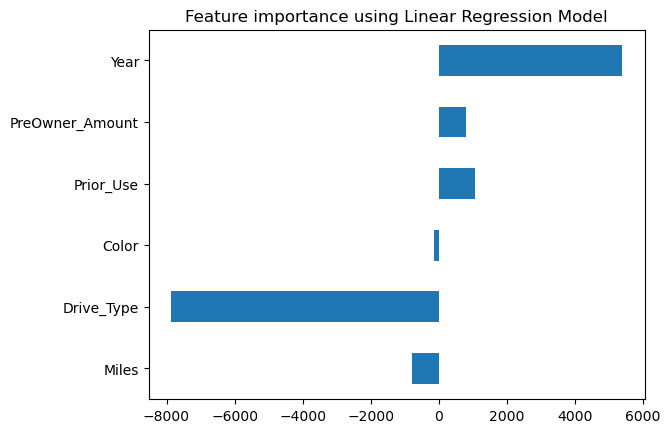

In [30]:
coef = pd.Series(linear.coef_, index = X_train.columns)
coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.show()

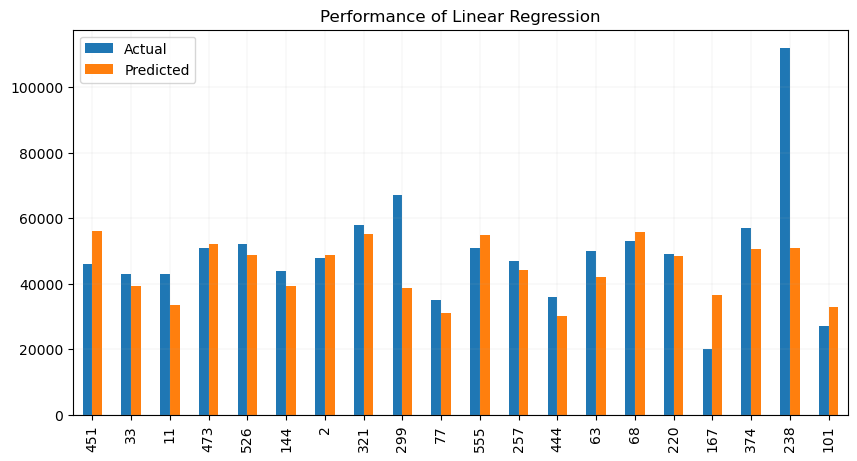

In [31]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(linestyle='-', linewidth='0.1')
plt.title('Performance of Linear Regression')
plt.show()

In [32]:
# KNN
#estimating MSLE for k=1-10
KNN_MSLE=[]
for i in range(1,11):
    KNN = KNeighborsRegressor(n_neighbors = i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    error = np.sqrt(mean_squared_log_error(y_test, y_pred))
    KNN_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)
print("\n")
KNNlog_MSLE=[]
for i in range(1,11):
    KNN = KNeighborsRegressor(n_neighbors = i)
    KNN.fit(X_train,ylog_train)
    ylog_pred = KNN.predict(X_test)
    error = np.sqrt(mean_squared_log_error(ylog_test, ylog_pred))
    KNNlog_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.25025594529018413
K = 2  , Root MSLE = 0.24039905621982013
K = 3  , Root MSLE = 0.24253168650249748
K = 4  , Root MSLE = 0.24746114880377615
K = 5  , Root MSLE = 0.26101412672575275
K = 6  , Root MSLE = 0.2613874303840497
K = 7  , Root MSLE = 0.2600466632494772
K = 8  , Root MSLE = 0.2671508108238036
K = 9  , Root MSLE = 0.27581625187149733
K = 10  , Root MSLE = 0.2841463822323284


K = 1  , Root MSLE = 0.021278629398113674
K = 2  , Root MSLE = 0.02028645648571845
K = 3  , Root MSLE = 0.02063087770888181
K = 4  , Root MSLE = 0.0212095606512795
K = 5  , Root MSLE = 0.022372858275301312
K = 6  , Root MSLE = 0.02252126686883212
K = 7  , Root MSLE = 0.022290907779042152
K = 8  , Root MSLE = 0.022891990046456638
K = 9  , Root MSLE = 0.023509627201810705
K = 10  , Root MSLE = 0.024315810992363435


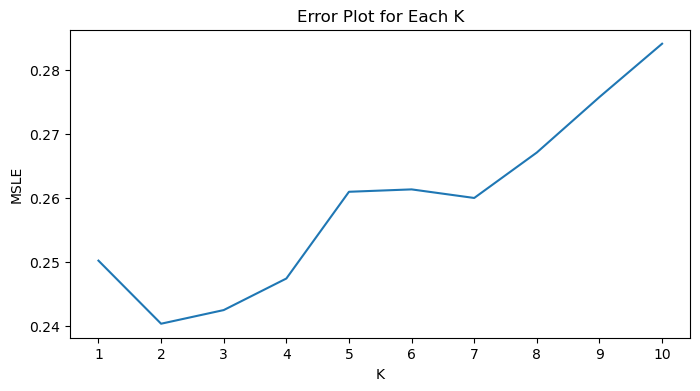

In [33]:
curve = pd.DataFrame(KNN_MSLE)
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,11)), list(range(1,11)), rotation='horizontal')
plt.plot(list(range(1,11)),KNN_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
#plt.savefig('KNN-Error-Plot.jpg')
plt.show()

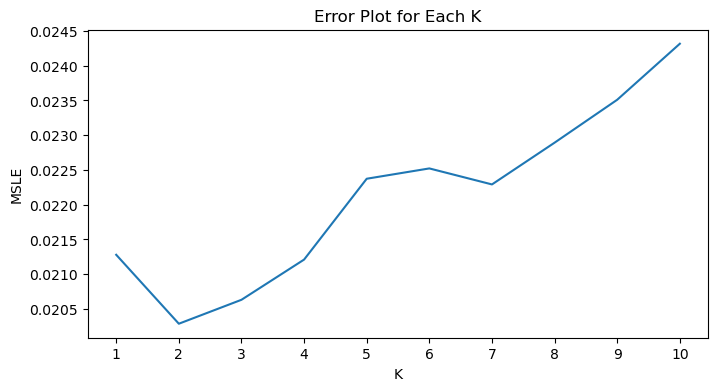

In [34]:
curve = pd.DataFrame(KNNlog_MSLE) 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,11)), list(range(1,11)), rotation='horizontal')
plt.plot(list(range(1,11)),KNNlog_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
#plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [35]:
KNN = KNeighborsRegressor(n_neighbors = 2) 
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

KNN_log = KNeighborsRegressor(n_neighbors = 2) 
KNN_log.fit(X_train,ylog_train)
ylog_pred = KNN_log.predict(X_test)

In [36]:
knn = result(y_test,y_pred)
print("MSLE : {}".format(knn[0]))
print("Root MSLE : {}".format(knn[1]))
print("R2 Score : {} or {}%".format(knn[2],knn[3]))
print('MSE: ', knn[4])
evaluation['KNN'] = knn

knn_log = result(ylog_test,ylog_pred)
print("MSLE : {}".format(knn_log[0]))
print("Root MSLE : {}".format(knn_log[1]))
print("R2 Score : {} or {}%".format(knn_log[2],knn_log[3]))
print('MSE: ', knn_log[4])
evaluation['KNN (Price log)'] = knn_log

MSLE : 0.05779170623138024
Root MSLE : 0.24039905621982013
R2 Score : 0.2681679591552648 or 26.8168%
MSE:  194886160.7142857
MSLE : 0.0004115403167469482
Root MSLE : 0.02028645648571845
R2 Score : 0.4835808695824231 or 48.3581%
MSE:  0.05781730460319967


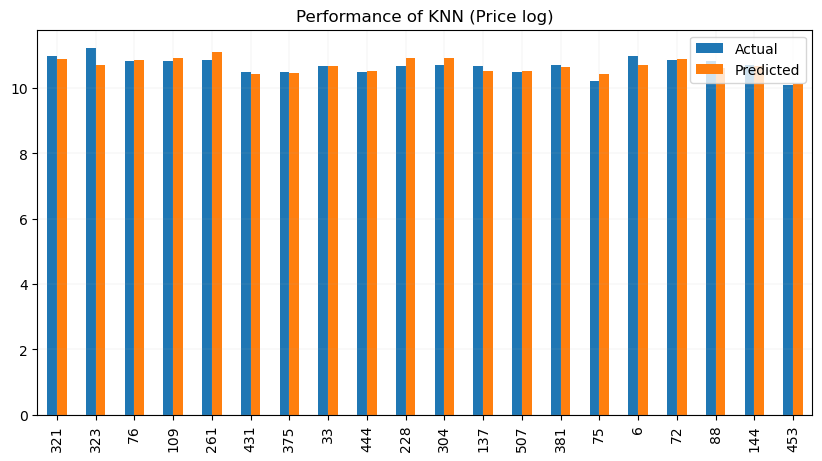

In [37]:
df_check = pd.DataFrame({'Actual': ylog_test, 'Predicted': ylog_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.title('Performance of KNN (Price log)')
#plt.savefig('Linear-Regression-Performance')
plt.show()

In [38]:
# Random Forest
RF = RandomForestRegressor(n_estimators = 200,random_state = 42, min_samples_leaf = 1, max_features = 0.5)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

RF_log = RandomForestRegressor(n_estimators = 200,random_state = 42, min_samples_leaf = 1, max_features = 0.5)
RF_log.fit(X_train,ylog_train)
ylog_pred = RF_log.predict(X_test)

In [39]:
rf = result(y_test,y_pred)
print("MSLE : {}".format(rf[0]))
print("Root MSLE : {}".format(rf[1]))
print("R2 Score : {} or {}%".format(rf[2],rf[3]))
print('MSE: ',rf[4])
evaluation['RandomForest Regressor'] = rf

rf_log = result(ylog_test,ylog_pred)
print("MSLE : {}".format(rf_log[0]))
print("Root MSLE : {}".format(rf_log[1]))
print("R2 Score : {} or {}%".format(rf_log[2],rf_log[3]))
print('MSE: ',rf_log[4])
evaluation['RandomForest Regressor (Price log)'] = rf_log

MSLE : 0.032260411101248866
Root MSLE : 0.1796118345244791
R2 Score : 0.49409629842541036 or 49.4096%
MSE:  134721663.69924632
MSLE : 0.0002240686932956639
Root MSLE : 0.01496892425312066
R2 Score : 0.7138305158855073 or 71.3831%
MSE:  0.03203899169616236


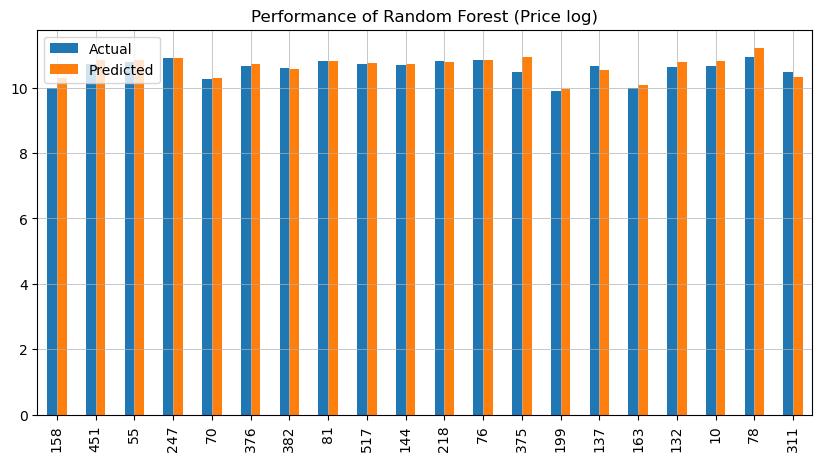

In [40]:
df_check = pd.DataFrame({'Actual': ylog_test, 'Predicted': ylog_pred})
df_check = df_check.head(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.title('Performance of Random Forest (Price log)')
plt.show()

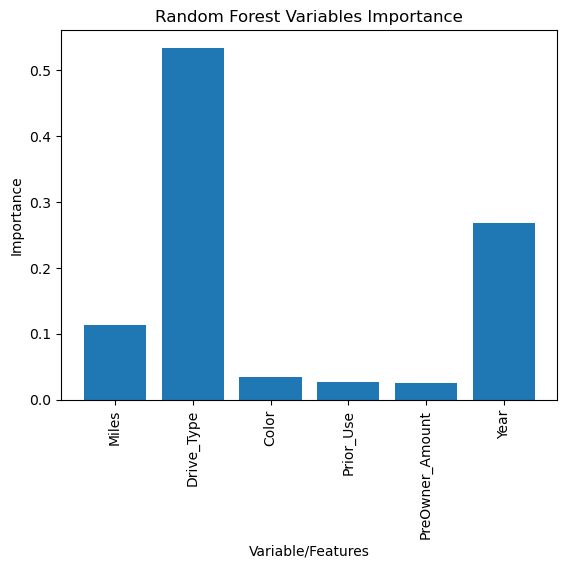

In [41]:
importances = RF_log.feature_importances_
features = X_train.columns

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = ('vertical'))
plt.xticks(x_values, features, rotation=(90))
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.show()

In [42]:
# Bagging Regressor
base_model = DecisionTreeRegressor(max_depth = 30, random_state = 42)
bagr = BaggingRegressor(base_estimator = base_model, n_estimators = 50, random_state = 42)
bagr.fit(X_train,y_train)
y_pred = bagr.predict(X_test)

bagr_log = BaggingRegressor(base_estimator = base_model ,n_estimators = 50, random_state = 42)
bagr_log.fit(X_train,ylog_train)
ylog_pred = bagr_log.predict(X_test)

In [43]:
br = result(y_test,y_pred)
print("MSLE : {}".format(br[0]))
print("Root MSLE : {}".format(br[1]))
print("R2 Score : {} or {}%".format(br[2],br[3]))
print('MSE: ',br[4])
evaluation['Bagging Regressor'] = br

br_log = result(ylog_test,ylog_pred)
print("MSLE : {}".format(br_log[0]))
print("Root MSLE : {}".format(br_log[1]))
print("R2 Score : {} or {}%".format(br_log[2],br_log[3]))
print('MSE: ',br_log[4])
evaluation['Bagging Regressor (Price log)'] = br_log

MSLE : 0.03402372523947113
Root MSLE : 0.18445521201492554
R2 Score : 0.4748838386959998 or 47.4884%
MSE:  139837923.0396009
MSLE : 0.00022972991205598368
Root MSLE : 0.015156843736609006
R2 Score : 0.7061999787608462 or 70.62%
MSE:  0.032893292133998234


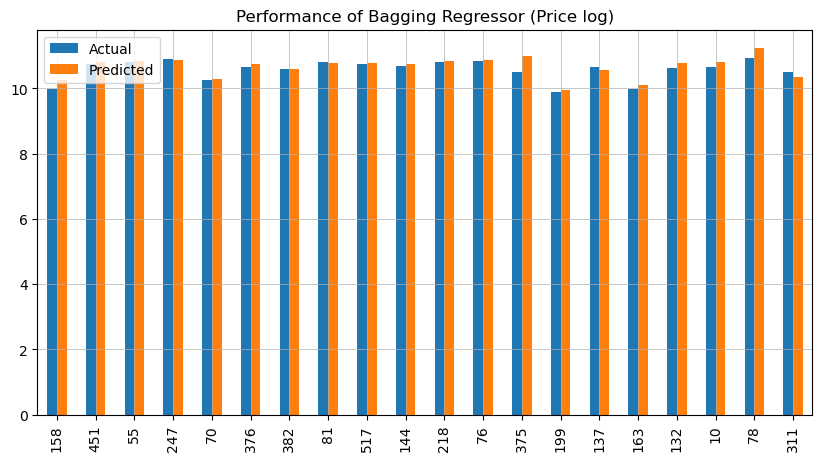

In [44]:
df_check = pd.DataFrame({'Actual': ylog_test, 'Predicted': ylog_pred})
df_check = df_check.head(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.title('Performance of Bagging Regressor (Price log)')
plt.show()

In [45]:
# AdaBoost
ABR = AdaBoostRegressor(base_model, n_estimators=200)
ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

ABR_log = AdaBoostRegressor(base_model, n_estimators=200)
ABR_log.fit(X_train, ylog_train)
ylog_pred = ABR_log.predict(X_test)

In [46]:
abr = result(y_test,y_pred)
print("MSLE : {}".format(abr[0]))
print("Root MSLE : {}".format(abr[1]))
print("R2 Score : {} or {}%".format(abr[2],abr[3]))
print('MSE: ',abr[4])
evaluation['AdaBoost Regressor'] = abr

abr_log = result(ylog_test,ylog_pred)
print("MSLE : {}".format(abr_log[0]))
print("Root MSLE : {}".format(abr_log[1]))
print("R2 Score : {} or {}%".format(abr_log[2],abr_log[3]))
print('MSE: ',abr_log[4])
evaluation['AdaBoost Regressor (price log)'] = abr_log


MSLE : 0.03662186216357076
Root MSLE : 0.19136839384697454
R2 Score : 0.4308086761285945 or 43.0809%
MSE:  151575095.96483228
MSLE : 0.0002656503769555254
Root MSLE : 0.016298784523869424
R2 Score : 0.6598276152841445 or 65.9828%
MSE:  0.03808505383758732


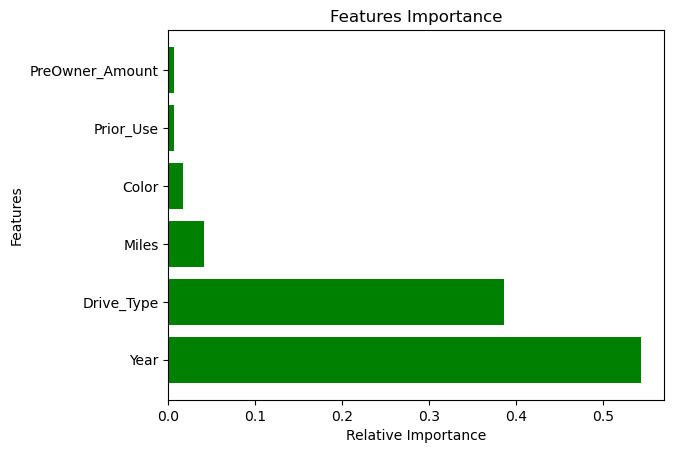

In [47]:
importances = ABR_log.feature_importances_
features = X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show();

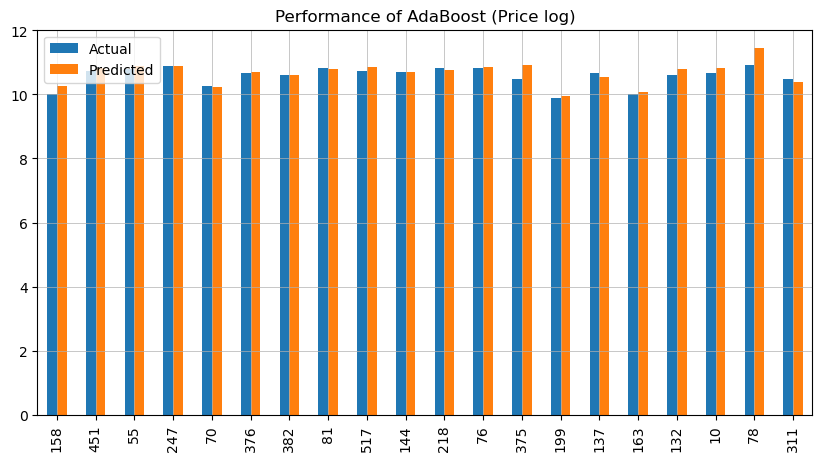

In [48]:
df_check = pd.DataFrame({'Actual': ylog_test, 'Predicted': ylog_pred})
df_check = df_check.head(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(linestyle='-', linewidth='0.5')
plt.title('Performance of AdaBoost (Price log)')
plt.show()

In [49]:
# XGBoost
XGB = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 200, max_depth = 20, learning_rate = 0.5)
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

XGB_log = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 200, max_depth = 50, learning_rate = 0.3)
XGB_log.fit(X_train,ylog_train)
ylog_pred = XGB_log.predict(X_test)

In [50]:
xgb_reg = result(y_test,y_pred)
print("MSLE : {}".format(xgb_reg[0]))
print("Root MSLE : {}".format(xgb_reg[1]))
print("R2 Score : {} or {}%".format(xgb_reg[2],xgb_reg[3]))
print('MSE: ',xgb_reg[4])
evaluation['XGBoost Regressor'] = xgb_reg

xgb_log = result(ylog_test,ylog_pred)
print("MSLE : {}".format(xgb_log[0]))
print("Root MSLE : {}".format(xgb_log[1]))
print("R2 Score : {} or {}%".format(xgb_log[2],xgb_log[3]))
print('MSE: ',xgb_log[4])
evaluation['XGBoost Regressor (Price log)'] = xgb_log

MSLE : 0.041092543881643635
Root MSLE : 0.20271295933324943
R2 Score : 0.3973531101616897 or 39.7353%
MSE:  160484280.64372072
MSLE : 0.00026539404525225356
Root MSLE : 0.016290919103974875
R2 Score : 0.6604379966860587 or 66.0438%
MSE:  0.03801671669560331


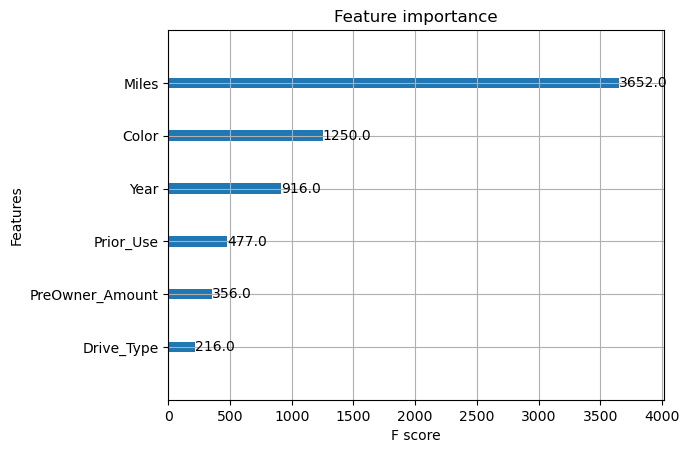

In [51]:
xgb.plot_importance(XGB_log)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show();

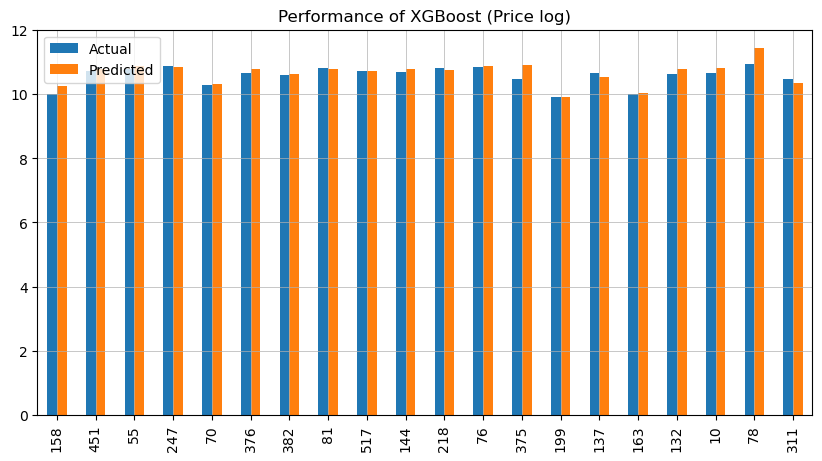

In [52]:
df_check = pd.DataFrame({'Actual': ylog_test, 'Predicted': ylog_pred})
df_check = df_check.head(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(linestyle='-', linewidth='0.5')
plt.title('Performance of XGBoost (Price log)')
plt.show()

In [53]:
evaluation.drop("MSE",axis = 0)

,Linear Regression,Linear Regression (Price log),KNN,KNN (Price log),RandomForest Regressor,RandomForest Regressor (Price log),Bagging Regressor,Bagging Regressor (Price log),AdaBoost Regressor,AdaBoost Regressor (price log),XGBoost Regressor,XGBoost Regressor (Price log)
MSLE,0.087345,0.000684,0.057792,0.000412,0.032260,0.000224,0.034024,0.000230,0.036622,0.000266,0.041093,0.000265
Root MSLE,0.295542,0.026155,0.240399,0.020286,0.179612,0.014969,0.184455,0.015157,0.191368,0.016299,0.202713,0.016291
R2 Score,0.169607,0.164710,0.268168,0.483581,0.494096,0.713831,0.474884,0.706200,0.430809,0.659828,0.397353,0.660438
Accuracy(%),16.960700,16.471000,26.816800,48.358100,49.409600,71.383100,47.488400,70.620000,43.080900,65.982800,39.735300,66.043800
